<a href="https://colab.research.google.com/github/taeheonkwon/JJ/blob/master/Lec71_day66_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM (Support Vector Machine)

SVM : 주로 분류에 사용되는 기계 학습 알고리즘

하나의 데이터를 좌표계(n 차원 공간)의 하나의 점으로 표시

n차원 공간상의 데이터 집단을 구분하는 초평면(Optimal Hyper Plane)을 찾아 분류를 수행

< 2차원 예시>

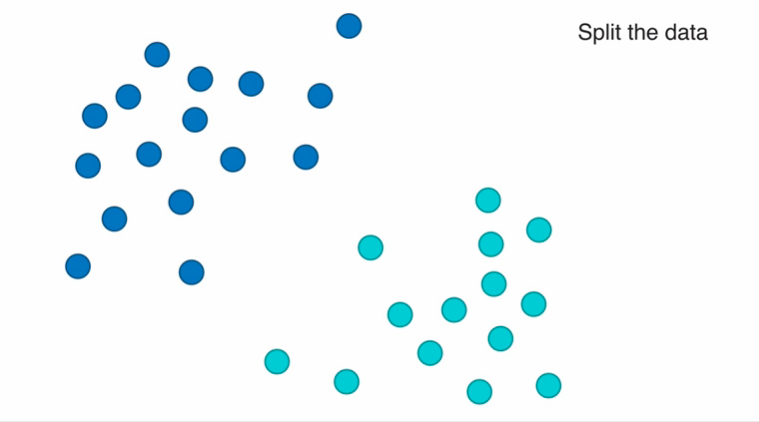

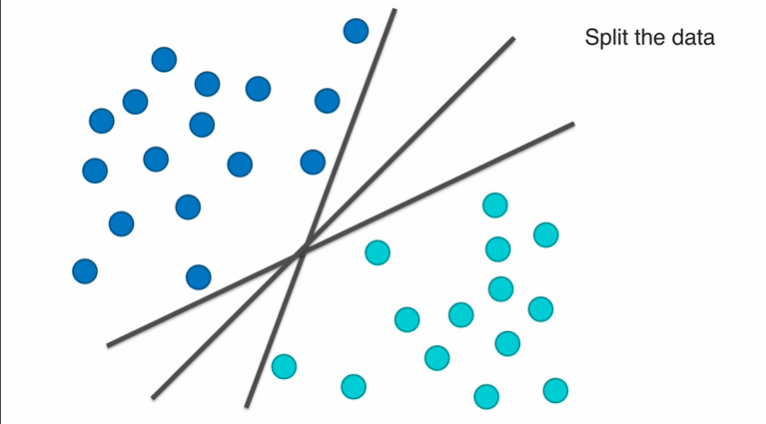

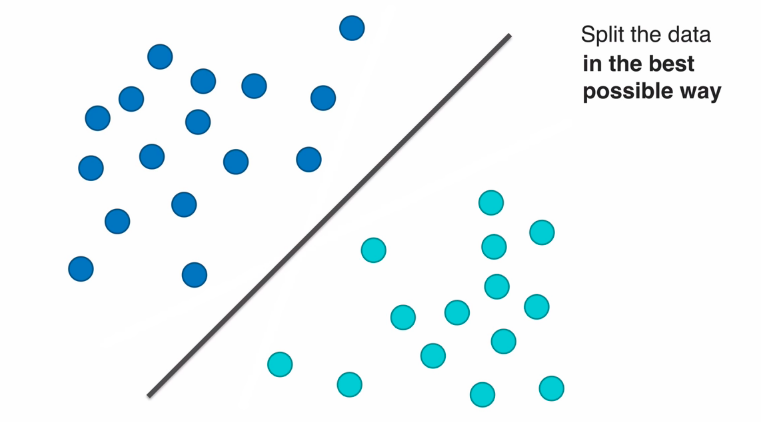

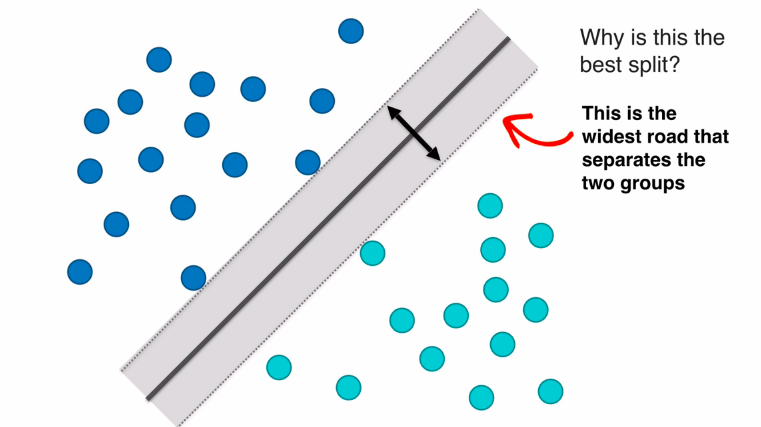

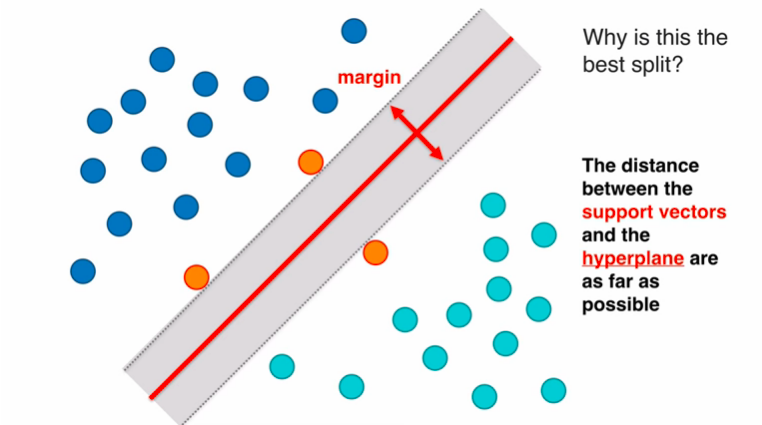

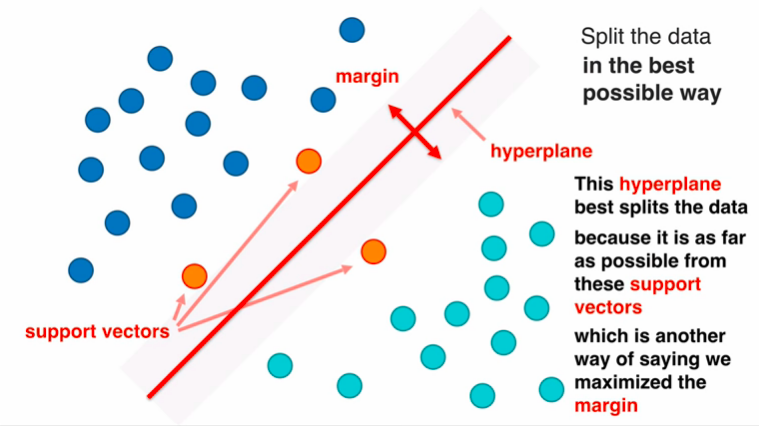

hyperplane을 찾으면 분류를 할 수 있다.

다음과 같은 그래를 생각하자. 새로운 벡터 u 가 + 그룹에 속하는지, - 그룹에 속하는지를 분류 해 내는 작업을 고려해 보자


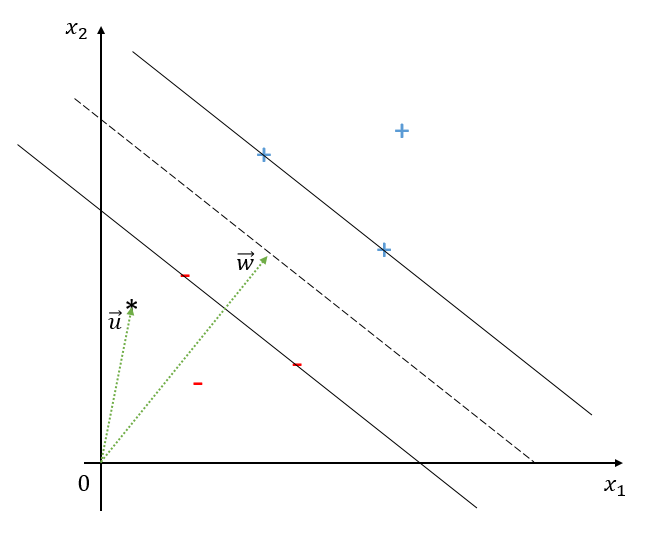

조건 1) 점선 아래에 있으면 -, 위에 있으면 +

그림에서 점선 라인보다 아래에 있으면 - 가 되고, 점선 보다 위에 있으면 + 가 된다. 즉, 

$$\vec{w} \cdot \vec{u} \ge c\ \Rightarrow\ +$$
$$\vec{w} \cdot \vec{u} \le c\ \Rightarrow\ -$$

만약, w를 단위벡터로 고치기 위해 w/|w|를 한 경우에도

|w|를 오른쪽으로 이항하면, 또 다른 상수 C' 이 되어 위 식은 성립한다.

b = -c 라 하면

$$\vec{w} \cdot \vec{u} + b \ge 0$$

점선으로 부터 support vector로 부터의 거리를 dx 라 하면, - 쪽 실선은 -dx 만큼 떨어져 있으며, + 쪽 실선은 dx 만큼 올라가져 있다. 따라서, 

$$\vec{w} \cdot \vec{x}_+ + b \ge +dx$$
$$\vec{w} \cdot \vec{x}_- + b \le -dx$$

여기서, 벡터 w 도, b 도 모르는 수이기 때문에, dx로 나누어 정규화 하여도 식은 마찬가지이다. 

$$\vec{w} \cdot \vec{x}_+ + b \ge +1$$
$$\vec{w} \cdot \vec{x}_- + b \le -1$$

위 두식을 하나로 나타내기 위해, 다음과 같은 y를 생각해보자

$$y_i=
\begin{cases}
+1, & \mbox{for }x_+  \\
-1, & \mbox{for }x_-
\end{cases}$$

그러면, 위에 식은 

$$y_i (\vec{w} \cdot \vec{x_i} + b) \ge 1$$

그러면 실선위의 점들은 

$$y_i (\vec{w} \cdot \vec{x_i} +b ) -1 =0 \quad \cdot \cdot \cdot (1)$$

조건 2) 가운데 점선은 두 실선을 가장 멀게 하는 조건으로 그린다. 

두 실선의 거리를 생각하기 위해선, 실선 위의 점들간의 거리를 생각해야 한다.


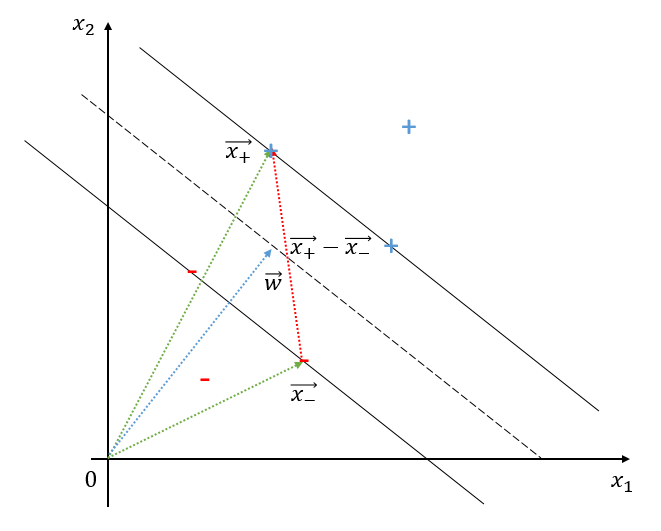

위 그림에서 빨간색 벡터를 벡터 w 에 정사영 시켰을때의 길이가 두 실선 사이의 거리가 되므로, 

$${\vec{w} \over |\vec{w}| } \cdot ( \vec{x}_+ - \vec{x}_-)$$

식(1)로 부터 (+ 일때 1, - 일때 -1)
$$ \vec{w} \cdot \vec{x}_+  = 1 - b \\ \vec{w} \cdot \vec{x}_- = -1 -b$$  

이므로, 

$${\vec{w} \over |\vec{w}| } \cdot ( \vec{x}_+ - \vec{x}_-) =  {1 \over |\vec{w}|}(\vec{w} \cdot \vec{x}_+ - \vec{w} \cdot \vec{x}_-) = {2 \over |\vec{w}|}$$

이 거리를 최대화 하는 것이므로, 역수를 취할 경우에는 최소화 하는 것이고

 $$ min\ \left( \ {1 \over 2}|\vec{w}|\ \right) $$

 크기는 절대값으로 나타므로, 제곱의 값을 최소화 하는 것과 같으므로, 

 $$ min\ \left( \ {1 \over 2} |\vec{w} |^2\ \right) $$

 $$y_i (\vec{w} \cdot \vec{x_i} +b ) -1 =0  \Rightarrow 조건$$ 

어떤 함수가 주어지고, 그 함수와 관련된 조건이 주어졌을 때, 최적화 문제는 라그랑지 승수를 사용하여 풀 수 있다. 

$$ L = {1 \over 2} |\vec{w}|^2 - \sum_i \alpha_i[y_i (\vec{w} \cdot \vec{x_i} +b ) -1]$$

여기서, summation 은 제약 조건이 하나가 아니라 여러개 인 경우를 고려한 것이며, alpha 는 조절값  혹은 고유값으로 생각할 수 있다. 

상기 식을 w 와 b에 대해 편미분하여 극값의 조건을 찾으면, 다음과 같이 나온다. 

$$
{\partial L \over \partial \vec{w}} = \vec{w} - \sum \alpha_i y_i x_i = 0 \quad \Rightarrow
\quad \vec{w} = \sum \alpha_i y_i x_i \\
{\partial L \over \partial b} = - \sum \alpha_i y_i = 0 \quad \Rightarrow \quad \sum \alpha_i y_i = 0 
$$

$$\vec{w} = \sum_i \alpha_i y_i \vec{x}_i$$
$$\sum_i \alpha_i y_i = 0$$

이 식을, L 에 대입하여 정리하면, 

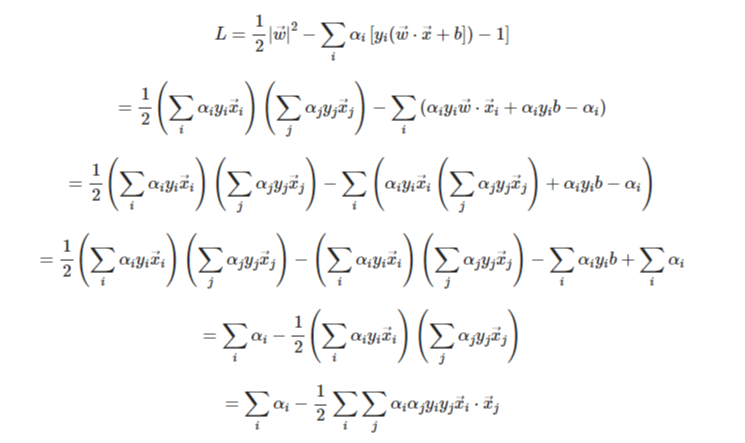

$$L = \sum_i \alpha_i - {1 \over 2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \vec{x}_i \cdot \vec{x}_j$$ 

위식은 dual 형식으로 최대화 해야 하는 식이다. 이렇게 되면, x값은 주어진 것이므로, alpha 를 구할 수 있다. (alpha에 대해 2차 방정식이다.)

https://medium.com/@sathvikchiramana/svm-dual-formulation-7535caa84f17

alpha를 구해 벡터 w를 구하고, 식(1)로부터 b를 구하여, hyperline 을 결정한다. 

여기서 주목해야 할 점은 L 이  xi 와 xj의 내적에만 관여 한다는 사실이다. 

 $$\vec{w} \cdot \vec{u} + b \ge 0 \\
\quad \\
\\
\sum_i \alpha_i y_i \vec{x}_i \cdot \vec{u} + b \ge 0
$$

dual => duality => LP duality(Linear Programming Duality) 

원래 주어진 문제 : primal problem

primal problem에서 구해야하는 변수 외의 변수를 제한 조건을 사용하여 도입해 새로운 식을 만들어 내고, 새로 만들어진 식의 변수들을 찾아 내어 primal problem 을 푸는 것

분류 전용 데이터 셋을 만들어 주는 forge 프로그램 함수를 사용하여 선형 모델들의 결정 경계를 그려 보자

SVM 은 분류형 선형 모델이다. 우리가 알고 있는 또 다른 분류형 선형 모델은 로지스틱이 있다.


- LogisticRegression, LinearSVC 은 모두 L2 규제를 사용한다. 

- 규제 강도를 결정하는 매개 변수는 C

- C 가 증가, 규제 감소, 훈련세트에 최적화 하려 함

- C 가 감소, 규제 증가, w 를 0에 가까워 진다. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 3.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=c8fd147144a83746ca21551a3ea2de9c2e19cd57f457ee503b461063a461b145
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import mglearn
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [ ]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
for i, j in zip([10, 100], 'TE'):
    print(i, j)

10 T
100 E


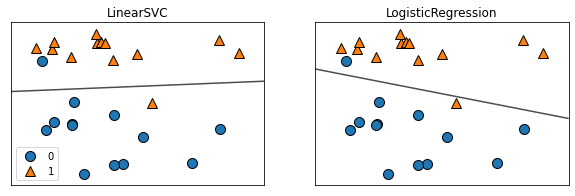

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
axes[0].legend()

- 위 그림에서 x 와  y는 각각 첫번째 특성과 두번째 특성이 된다.

- 결정 경계가 모두 직선

- 직선 아래는 클래스 0, 직선 위는 1, 즉 새로운 데이터가 들어와서 직선 위에 있으면 1로 분류, 아래에 있으면 0으로 분류

- 로지스틱과 svc 모두 비슷한 경계, 각각 2개의 데이터가 잘못 분류

- 로지스틱과 svc 모두 L2 규제를 사용 -> 규제 강도를 결정하는 매개 변수 C 

- 높은 C 값 - 훈련 세트에 가능한 최대로 맞춤, C 값을 낮추면 모델의 계수 벡터 w를 0에 가깝게 한다

실제 C 값을 변경해 가며 그려보자

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


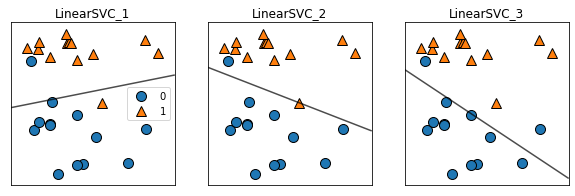

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

i = 0
for model, ax in zip([LinearSVC(max_iter=5000, C=0.01), LinearSVC(max_iter=5000, C=10), LinearSVC(max_iter=5000, C=1000)], axes):
    i = i+1
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__ + '_'+str(i))
axes[0].legend()

- svc 1, c가 작음, 규제가 강함, 오분류 2개, 비교적 수평

- svc 2, c가 늘어 남, 규제는 완화, 오분류의 영향으로 경계가 반대의 기울기를 보이며, 기울기 시작

- svc 3, c를 아주 크게 함, 규제는 약해짐, 기울기가 높아지고, 분류 포인트는 1개로 줄어 듬, 

- 클래스의 전체적인 배치와 어울리 않는 경계 결정 -> 과적합

#SVM의 파라미터들


In [ ]:
import numpy as np
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

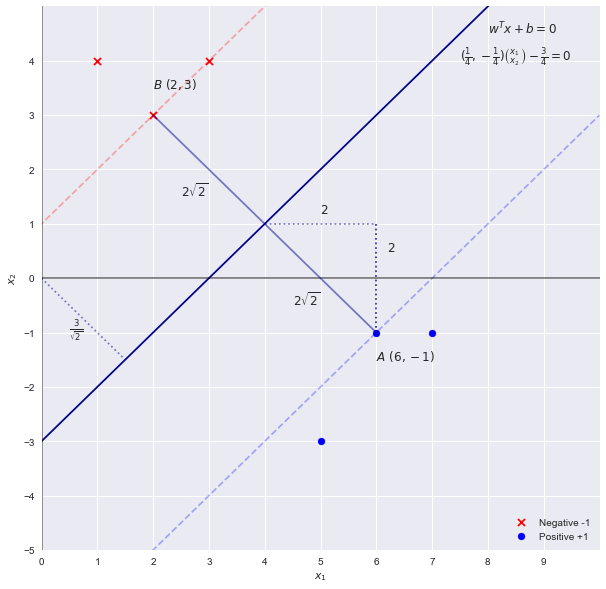

위 그림에서 가운데 직선만 생각했을때, 직관적으로 

y = x - 3 을 유추 할 수 있다. 

이 식을 위 그래프의 표기법대로 고치면

$$x_2 = x_1 -3 \\
\quad 
\\
x_1 + (-1) \times x_2 - 3 = 0 \\
\quad \\
{1 \choose -1}{x_1 \choose x_2} - 3 = 0
\quad \\
\therefore \ w = (1, -1), \ \ b=-3
$$


즉, 위 식중 2번째 식에서 그래프를 그리기 위해 y = ax + b를 생각해 보면, x2의 계수 (-1)*w[1] 으로 x1의 계수 w[0] 를 나눠야 기울기 a 가 나오고, intercept 값을 (-1)*w[1] 으로 나눠야 b가 나온다

이론에서, 두 support vector의 거리는 

$${2 \over ||w||} = { 2 \over \sqrt{2}} = \sqrt{2}$$

그런데 그림에서 실제 거리는 
$$4 \sqrt{2}$$이다

즉, 우리가 그래프를 보고 추정한 직선은 정확한 직선의 방정식이 아니다.

 scaling (=매개변수를 추정하기 위해 차원이나 크기를 조정하는 일)이 필요한 직선의 식이다.

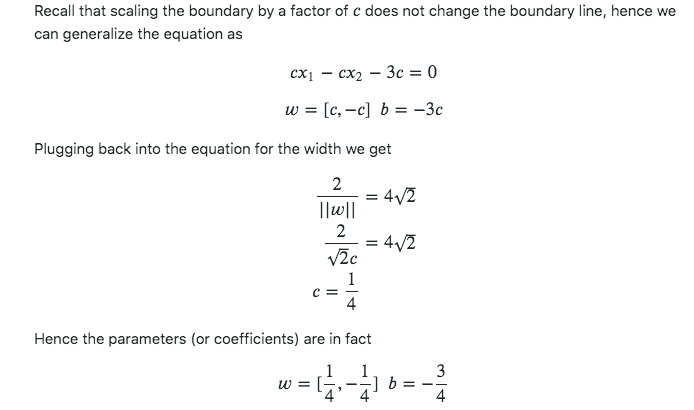

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X, y) 
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
#print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]


sklearn의 SVM 에는 SVC, SVR 이 있어 SVC 는 분류에 사용, SVR 은 회귀에 사용

SVC 중 kernel = ' linear' 로 특화 시켜 속도를 업그래이드 해놓은것을 LinearSVC 이다. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
X_nag = X[:3]
X_pos = X[3:]
y = np.array([-1,-1, -1, 1, 1 , 1 ])

In [ ]:
X_nag

array([[3, 4],
       [1, 4],
       [2, 3]])

In [ ]:
X_pos

array([[ 6, -1],
       [ 7, -1],
       [ 5, -3]])

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(kernel='linear')

In [ ]:
w0=clf.coef_[0][0]

In [ ]:
w1 = clf.coef_[0][1]

In [ ]:
b=clf.intercept_[0]

In [ ]:
a = -w0/w1

In [ ]:
b = - b/w1

In [ ]:
half_margin = 1/w1

In [ ]:
x_data = np.arange(11)

In [ ]:
hyperline = a*x_data + b
down_line = hyperline + half_margin
up_line = hyperline - half_margin

Text(2.5, 1.7, '$2 \\sqrt{2}$')

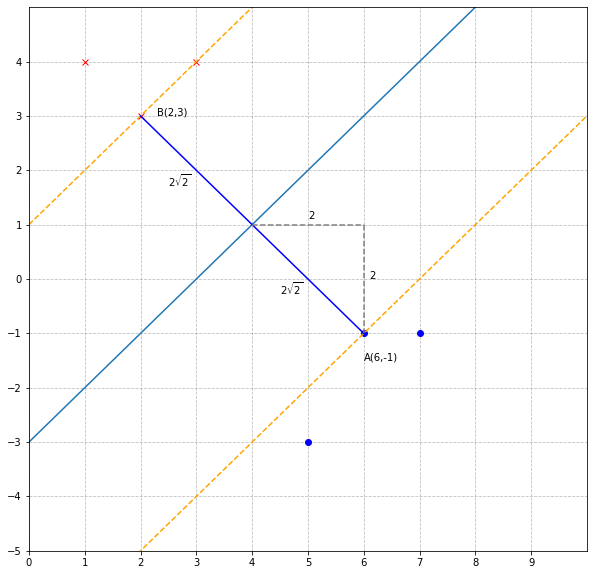

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(X[:, 0][y==-1], X[:, 1][y==-1],'rx')
plt.plot(X[:, 0][y==1], X[:, 1][y==1],'bo')
plt.plot(x_data, hyperline)
plt.plot(x_data, up_line, '--', color='orange')
plt.plot(x_data, down_line, '--', color='orange')
plt.plot([2, 6], [3, -1], color='b')
plt.ylim(-5, 5)
plt.xlim(0, 10)
plt.yticks(np.arange(plt.ylim()[0],plt.ylim()[1],1))
plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1],1))
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.text(2.3,3, 'B(2,3)')
plt.text(6, -1.5, 'A(6,-1)')
plt.plot([4,6], [1, 1], '--', color='gray')
plt.plot([6,6], [1, -1], '--', color='gray')
plt.text(5,1.1, '2')
plt.text(6.1, 0, '2')
plt.text(4.5, -0.3, r'$2 \sqrt{2}$')
plt.text(2.5, 1.7, r'$2 \sqrt{2}$')

In [ ]:
x_range

(0.0, 10.0)